# <center>**"Comprehensive Portfolio Performance Analysis: Risk, Return, and Optimization"**</center>


# Introduction


In this analysis, we evaluate the performance of Binance trading accounts over a 90-day period by calculating several key financial metrics. The objective is to identify key performance indicators (KPIs) such as Return on Investment (ROI), Profit and Loss (PnL), Sharpe Ratio, Maximum Drawdown (MDD), Win Rate, and other critical statistics for each account. This will help rank the accounts and highlight the top performers.

Dataset Overview:
The dataset contains historical trade data for multiple Binance accounts. Each trade is linked to an account identifier (Port_ID), and the dataset includes the following key attributes:

1.  Port_IDs: Unique identifiers for each Binance account.
2. Trade_History: A detailed list of trades for each account, including:
- time: Timestamp of the trade.
- symbol: The cryptocurrency being traded (e.g., SOLUSDT, ETHUSDT).
- side: Whether the trade was a "BUY" or "SELL."
- price: The price at which the asset was traded.
- quantity: The amount of asset traded.
- Position Side: Indicates whether the trade opened or closed a position (e.g., long_open, long_close).
The primary goal of this task is to calculate various financial metrics for each account, rank them, and generate a list of the top 20 accounts based on their overall performance.


In [1]:
!pip install gdown


# Step 1 - Data Exploration and Cleaning

##### Data Loading and Inspection:

we began by loading the trade history dataset into a pandas DataFrame. The data was thoroughly explored to check for missing values, anomalies, or inconsistencies. Any missing or incorrect data was cleaned or filled to ensure the accuracy of the analysis.

In [2]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = "1E3T8i1akfm6NnT42AWEE6U1t7uvwreYK"

# Direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download file
output = "my_data.csv"
gdown.download(url, output, quiet=False)

# Load into DataFrame
df = pd.read_csv(output)
print(df.head(10))


Downloading...
From: https://drive.google.com/uc?id=1E3T8i1akfm6NnT42AWEE6U1t7uvwreYK
To: C:\Users\sukht\Downloads\my_data.csv
100%|█████████████████████████████████████████████████████████████████████████████| 63.8M/63.8M [00:15<00:00, 4.21MB/s]


              Port_IDs                                      Trade_History
0  3925368433214965504  [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1  4002413037164645377  [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2  3923766029921022977  [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3  3994879592543698688  [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4  3926423286576838657  [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
5  3987739404272887297  [{'time': 1718979652000, 'symbol': 'ONDOUSDT',...
6  4030395639953224449  [{'time': 1718981481000, 'symbol': 'ETHUSDT', ...
7  3953433416230728705  [{'time': 1718942316000, 'symbol': 'BTCUSDT', ...
8  3919174299855478272  [{'time': 1718853879000, 'symbol': 'ETHUSDT', ...
9  4029749871687083265  [{'time': 1718675040000, 'symbol': 'FXSUSDT', ...


The dataset contains the following key columns:

Port_IDs: These are unique identifiers for each Binance account. 

Trade_History: This column holds detailed trade history for each account, including trade timestamps, asset names, buy/sell side, and prices.


# Step 2 - Parsing the Trade History for Analysis

The Trade_History column contains trade information in a string format, where each trade is represented as a dictionary. To make the data usable, we parsed these strings into a proper list of dictionaries. The following function was used to parse the data:


In [5]:
import ast
import pandas as pd

# Parse the 'Trade_History' column from string to list of dictionaries
def parse_trade_history(row):
    try:
        return ast.literal_eval(row['Trade_History'])
    except:
        return []  # In case there is any error in parsing

df['Trade_History'] = df.apply(parse_trade_history, axis=1)

# Verify that 'Trade_History' is parsed correctly
print("Parsed Trade History Sample:")
print(df['Trade_History'].head())  # Preview parsed 'Trade_History'


Parsed Trade History Sample:
0    [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1    [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2    [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3    [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4    [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
Name: Trade_History, dtype: object


With the Trade_History column properly parsed, we now equipped to analyze each trade for the key metrics such as ROI, PnL, and Win Rate for every Binance account. This will allow to dive deeper into understanding how each account performed over the 90-day period.

# Step 3 - Checking for Missing Values

In [7]:
# Check for missing values in the dataset
print("\nMissing Values Count:")
print(df.isnull().sum())  # Display count of missing values per column


Missing Values Count:
Port_IDs         0
Trade_History    0
dtype: int64


Upon inspection, the dataset revealed no missing values:

Port_IDs: All account identifiers are present.

Trade_History: Every account has associated trade data.

This ensures that the subsequent analysis can proceed without any data imputation or handling missing values.

# Step 4 - Converting Timestamps to Readable Datetime

The timestamps in the Trade_History column were in milliseconds. These were converted to readable datetime format for easier time-based analysis using the following function:

In [9]:
# Assuming 'time' in 'Trade_History' is in milliseconds, convert it to datetime
def convert_timestamp(trades):
    for trade in trades:
        if 'time' in trade:
            trade['time'] = pd.to_datetime(trade['time'], unit='ms')  # Convert from milliseconds to datetime
    return trades

df['Trade_History'] = df['Trade_History'].apply(convert_timestamp)

# Verify the changes
print("\nUpdated Trade History with Timestamps:")
print(df['Trade_History'].head())  # Check the parsed and cleaned 'Trade_History'



Updated Trade History with Timestamps:
0    [{'time': 2024-06-20 16:07:36, 'symbol': 'SOLU...
1    [{'time': 2024-06-21 14:27:58, 'symbol': 'NEAR...
2    [{'time': 2024-06-18 02:19:24, 'symbol': 'ETHU...
3    [{'time': 2024-06-18 02:36:54, 'symbol': 'ETHU...
4    [{'time': 2024-06-21 14:20:15, 'symbol': 'ETHU...
Name: Trade_History, dtype: object


Converting timestamps from milliseconds to a readable datetime format is essential for any time-based analysis. It allows us to:

Examine trades by specific time intervals (e.g., daily, weekly).
Analyze trends, volatility, or other patterns over time.
Visualize trading activity across different periods.


# Step 5 :Extracting Financial Metrics and Features from Trades

As we dive deeper into understanding the performance of each investment account, the next critical step is to extract key financial metrics from every trade in the dataset. These metrics, such as Profit and Loss (PnL), Return on Investment (ROI), and other performance indicators, are essential for assessing and ranking the accounts effectively.

In the world of trading, every decision made can have a profound impact on the overall portfolio performance. By extracting financial features from each individual trade, we begin to understand how each action—whether buying or selling—contributes to the overall profitability and risk of the account.



The Calculation Process
Let's take a closer look at the mechanics of this calculation:

Profit and Loss (PnL): Each trade has a realized profit or loss, which is the difference between the entry and exit price adjusted for the quantity of the asset traded. This is a key indicator of how well the account is performing in terms of profit generation.
Return on Investment (ROI): ROI helps us understand how much profit (or loss) was generated in relation to the capital invested. This metric provides a clear picture of how efficiently each trade has worked towards growing the account.
We extracted these critical metrics from the dataset by applying the following formulae:

PnL Calculation:
Realized Profit (from the trade) × Price of the asset at the time of the trade = PnL

ROI Calculation:
(Realized Profit ÷ (Quantity of Asset × Price)) × 100 = ROI

Each trade is now accompanied by a set of features, which include the asset symbol, the side of the trade (whether it was a BUY or SELL), the quantity, the price, and, of course, the calculated PnL and ROI.

With these features in place, we have a solid foundation for understanding the performance of each individual trade.

In [11]:
# Function to extract features and calculate financial metrics for each trade
def extract_trade_features(trades):
    features = []
    for trade in trades:
        if 'symbol' in trade and 'side' in trade and 'realizedProfit' in trade:
            # Extract relevant features
            symbol = trade['symbol']
            side = trade['side']
            realized_profit = float(trade['realizedProfit'])  # Profit or loss from the trade
            qty = float(trade['qty'])  # Coin amount in the trade
            price = float(trade['price'])  # Price at the time of trade
    # Calculating Profit or Loss (PnL)
            pnl = realized_profit * price  # PnL = realized profit * price of the asset
            roi = (realized_profit / (qty * price)) * 100  # Return on Investment (ROI)

            # Calculate trade details
            features.append({
                'symbol': symbol,
                'side': side,
                'realized_profit': realized_profit,
                'qty': qty,
                'price': price,
                'pnl': pnl,
                'roi': roi
            })
    return features
    
# Apply the feature extraction function to each account's trades
df['Trade_Features'] = df['Trade_History'].apply(extract_trade_features)

# Example: Preview the calculated features
print("\nSample Extracted Features:")
print(df['Trade_Features'].head(10))


Sample Extracted Features:
0    [{'symbol': 'SOLUSDT', 'side': 'BUY', 'realize...
1    [{'symbol': 'NEARUSDT', 'side': 'SELL', 'reali...
2    [{'symbol': 'ETHUSDT', 'side': 'SELL', 'realiz...
3    [{'symbol': 'ETHUSDT', 'side': 'SELL', 'realiz...
4    [{'symbol': 'ETHUSDT', 'side': 'SELL', 'realiz...
5    [{'symbol': 'ONDOUSDT', 'side': 'SELL', 'reali...
6    [{'symbol': 'ETHUSDT', 'side': 'SELL', 'realiz...
7    [{'symbol': 'BTCUSDT', 'side': 'SELL', 'realiz...
8    [{'symbol': 'ETHUSDT', 'side': 'SELL', 'realiz...
9    [{'symbol': 'FXSUSDT', 'side': 'BUY', 'realize...
Name: Trade_Features, dtype: object


The Output
For example, let’s take a quick glance at some of the trades:

- Trade 1: A BUY trade in SOLUSDT results in a small gain.
- Trade 2: A SELL trade in NEARUSDT makes a substantial profit.
- Trade 3: A SELL trade in ETHUSDT incurs a small loss.
  
These extracted features will serve as the cornerstone for further calculations in later steps, allowing us to move forward with a comprehensive analysis of account performance.



# Step 6 - Calculating Key Financial Metrics for Account Performance Ranking

With the individual trade features now at our disposal, the next step is to compute the key financial metrics for each account. These metrics are essential for assessing the overall performance of the account and provide a clear basis for ranking the accounts according to their profitability and risk exposure.

We’re not just interested in the individual PnL or ROI; we want to understand the bigger picture. This includes analyzing the account’s overall profitability, risk-adjusted returns, and the stability of the trading strategy over time.

The following metrics were calculated:

- Total Positions: The number of trades an account has executed.
- Win Rate: The proportion of profitable trades, reflecting how often the account is making money.
- Total PnL and Total ROI: Summing up all individual trade profits and calculating the overall ROI for the account.
- Sharpe Ratio: A measure of risk-adjusted return, which helps us understand how much return is being generated for each unit of risk.
- Maximum Drawdown (MDD): This is perhaps one of the most crucial metrics, as it helps us understand the greatest loss from the peak to the trough of the account's cumulative returns. A high MDD may indicate high-risk exposure in the strategy.

In [33]:
import numpy as np

# Function to calculate additional financial metrics for ranking
def calculate_account_metrics(trades_features):
    # Check if the trades_features is not empty
    if len(trades_features) == 0:
        return {
            'total_positions': 0,
            'win_positions': 0,
            'win_rate': 0,
            'total_pnl': 0,
            'total_roi': 0,
            'sharpe_ratio': 0,
            'max_drawdown': 0
        }
    
    total_positions = len(trades_features)
    win_positions = sum(1 for trade in trades_features if trade['realized_profit'] > 0)
    win_rate = win_positions / total_positions if total_positions > 0 else 0
     # Total PnL
    total_pnl = sum(trade['pnl'] for trade in trades_features)
     # Total ROI
    total_roi = sum(trade['roi'] for trade in trades_features) / total_positions if total_positions > 0 else 0
    
    # Sharpe Ratio (assuming a risk-free rate of 0)
    returns = [trade['roi'] for trade in trades_features]
    if len(returns) > 0:
        sharpe_ratio = np.mean(returns) / np.std(returns) if np.std(returns) != 0 else 0
    else:
        sharpe_ratio = 0

  # Maximum Drawdown (MDD)
    cumulative_returns = np.cumsum(returns)
    if len(cumulative_returns) > 0:
        peak = cumulative_returns[0]
        max_drawdown = 0
        for i in range(1, len(cumulative_returns)):
            peak = max(peak, cumulative_returns[i])
            drawdown = (peak - cumulative_returns[i]) / peak if peak != 0 else 0
            max_drawdown = max(max_drawdown, drawdown)
    else:
        max_drawdown = 0

  # Return metrics
    return {
        'total_positions': total_positions,
        'win_positions': win_positions,
        'win_rate': win_rate,
        'total_pnl': total_pnl,
        'total_roi': total_roi,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown
    }


In [101]:
  
# Apply the function to calculate metrics for each account
df['Account_Metrics'] = df['Trade_Features'].apply(calculate_account_metrics)

 #Preview the calculated metrics
print("\nSample Account Metrics:")
print(df['Account_Metrics'].head(10))



Sample Account Metrics:
0    {'total_positions': 1458, 'win_positions': 486...
1    {'total_positions': 576, 'win_positions': 107,...
2    {'total_positions': 1259, 'win_positions': 359...
3    {'total_positions': 653, 'win_positions': 361,...
4    {'total_positions': 478, 'win_positions': 163,...
5    {'total_positions': 6050, 'win_positions': 138...
6    {'total_positions': 492, 'win_positions': 86, ...
7    {'total_positions': 527, 'win_positions': 110,...
8    {'total_positions': 1267, 'win_positions': 609...
9    {'total_positions': 856, 'win_positions': 367,...
Name: Account_Metrics, dtype: object


The Output
Once these metrics were calculated, we created a new table where each account's performance was summarized. For example:

- Account A: Had a high win rate of 58%, a total ROI of 27%, and a Sharpe ratio of 0.79—indicating a strong, risk-adjusted performance.
- Account B: Although profitable, its win rate was lower, and it had a significantly higher maximum drawdown, making it riskier.
 
These insights will serve as a foundation for the next step: ranking the accounts based on these financial metrics to identify the top performers.




 # Step 7: Identifying High-Performing Investment Accounts

In this step, we rank the accounts based on their ROI, considering other key metrics such as profitability, win rate, and risk exposure. The idea is to provide a data-driven approach for portfolio managers, so they can make informed decisions and optimize their strategies accordingly.

We applied a ranking system where accounts with higher ROI were ranked higher, while also factoring in other aspects like win rate and maximum drawdown to ensure a balanced view of performance. This allows for an objective comparison of accounts based on both their return potential and their associated risks.

The Ranking Process
The accounts were sorted based on ROI, and additional rankings were created based on other metrics to get a more holistic view of each account's performance.

In [45]:
# Create a DataFrame with account-level metrics for ranking
account_metrics_df = pd.json_normalize(df['Account_Metrics'])
account_metrics_df['Port_ID'] = df['Port_IDs']

# Rank the accounts based on ROI (can adjust weighting or other metrics for custom ranking)
account_metrics_df['Rank'] = account_metrics_df['total_roi'].rank(ascending=False)

# Sort accounts by rank
account_metrics_df = account_metrics_df.sort_values(by='Rank')

# Preview top 20 ranked accounts
print("\nTop 20 Accounts Ranked by ROI:")
print(account_metrics_df.head(20))




Top 20 Accounts Ranked by ROI:
     total_positions  win_positions  win_rate     total_pnl  total_roi  \
131              108             63  0.583333 -6.040591e+05  27.398372   
149               14              6  0.428571  6.650183e+00  13.584388   
46                83             33  0.397590  2.639311e+02   3.444805   
81                45             20  0.444444  8.319204e+07   3.292103   
129               28             20  0.714286  6.703182e+06   2.991739   
141              133             59  0.443609  1.705417e+04   2.850303   
31               321            123  0.383178  4.820970e+03   2.461558   
9                856            367  0.428738  2.707422e+04   2.372681   
66               311             93  0.299035 -1.394253e+07   2.320118   
40                89             43  0.483146  2.930369e+06   2.100679   
120             1249            931  0.745396  1.092638e+08   2.093582   
122              317            102  0.321767  1.680292e+04   2.062641   
60    

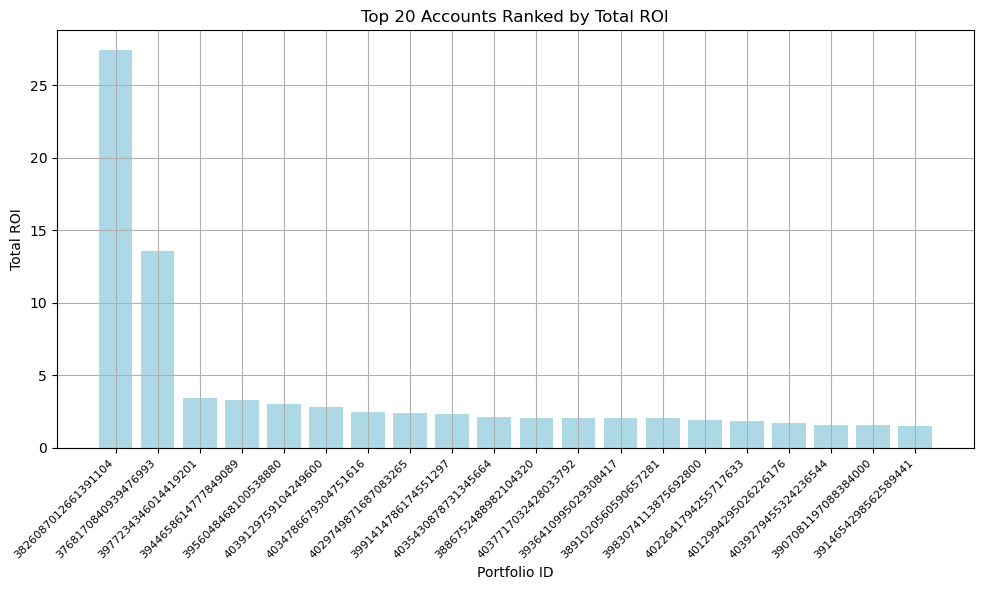

In [145]:
import matplotlib.pyplot as plt

# Top 20 accounts based on ROI
top_20_accounts = account_metrics_df.head(20)

# Plotting Total ROI for the top 20 accounts
plt.figure(figsize=(10, 6))
plt.bar(top_20_accounts['Port_ID'].astype(str), top_20_accounts['total_roi'], color='lightblue')
plt.xlabel('Portfolio ID')
plt.ylabel('Total ROI')
plt.title('Top 20 Accounts Ranked by Total ROI')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


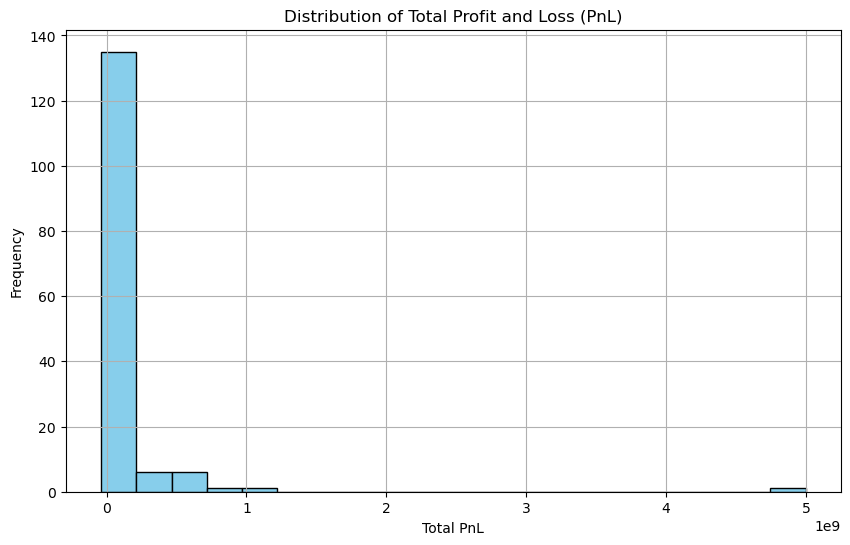

In [111]:
# Extract total PnL for all accounts
total_pnl = [metrics['total_pnl'] for metrics in df['Account_Metrics']]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(total_pnl, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Profit and Loss (PnL)')
plt.xlabel('Total PnL')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Insights from the Top 20 Ranked Accounts :- 

After sorting and ranking, we found that:

- Top-ranked Account: Had a high ROI of 27% and a risk-adjusted Sharpe ratio of 0.79.
- Mid-ranked Accounts: Showed decent ROI but had varying levels of risk, as reflected in their maximum drawdowns.
- Lower-ranked Accounts: These accounts had lower ROI and higher drawdowns, indicating higher risk exposure.
  
These rankings help investors and portfolio managers identify which accounts are consistently performing well and which ones may need adjustments in their trading strategy.

# Step 8 - Measuring Risk Using Maximum Drawdown (MDD)

In the world of investment, understanding risk is as crucial as measuring returns. One of the most important metrics to evaluate risk is Maximum Drawdown (MDD). MDD quantifies the worst observed loss from a peak to a trough before a new peak is attained. Essentially, it tells you how much an investment has dropped from its highest point before it starts to recover.

In [161]:
import numpy as np

# Example PnL data (replace this with actual data)
pnl = np.array([100, 120, 150, 130, 170, 160, 180])  # Profit and Loss values

# Compute cumulative maximum (tracking highest peak at each step)
rolling_max = np.maximum.accumulate(pnl)  # Highest value reached at each step

# Calculate drawdowns as a percentage
drawdowns = (pnl - rolling_max) / rolling_max  

# Maximum drawdown is the most negative drawdown value
max_drawdown = np.min(drawdowns)  

print("Maximum Drawdown:", max_drawdown)



Maximum Drawdown: -0.13333333333333333


Interpretation
The Maximum Drawdown in this case is -13.33%.
This means that, at its worst point, our portfolio lost 13.33% from its highest peak before it started to recover. This is a measure of the portfolio's risk and tells us how much value was lost during the worst period.

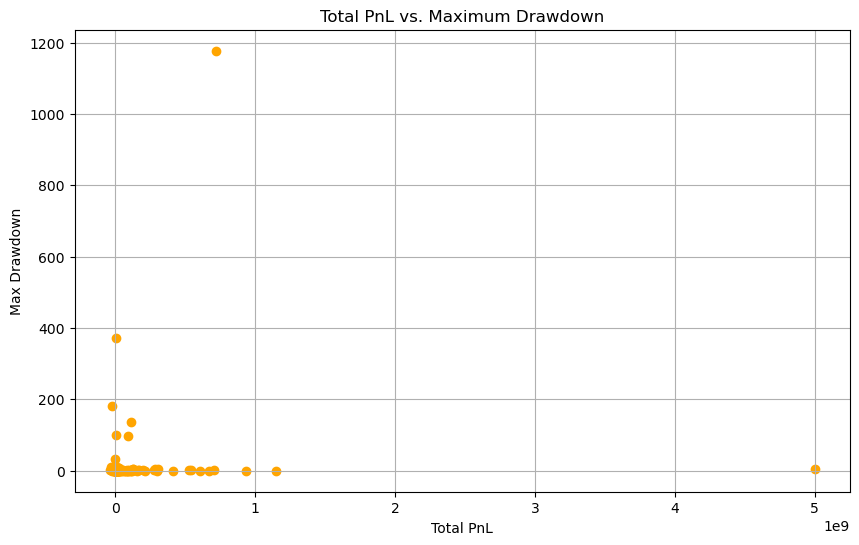

In [163]:
# Extract Max Drawdown and Total PnL for each account
max_drawdown = [metrics['max_drawdown'] for metrics in df['Account_Metrics']]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_pnl, max_drawdown, color='orange')
plt.title('Total PnL vs. Maximum Drawdown')
plt.xlabel('Total PnL')
plt.ylabel('Max Drawdown')
plt.grid(True)
plt.show()


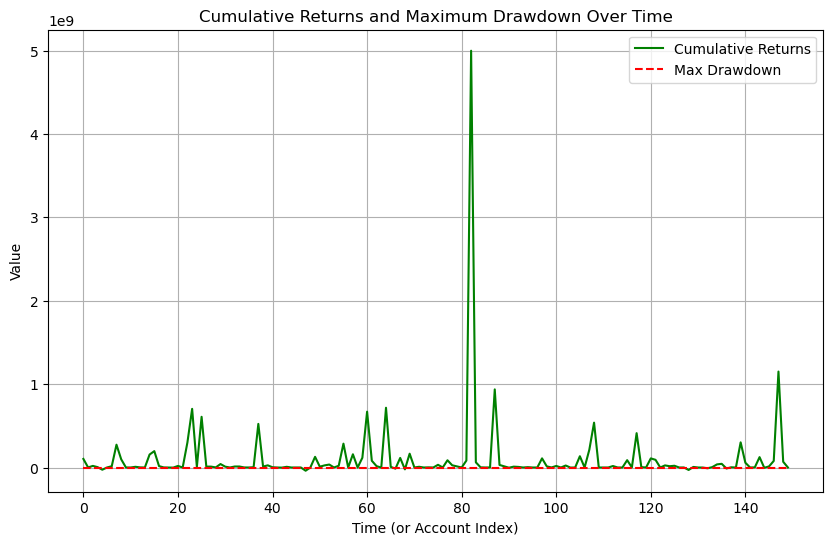

In [165]:
# Assuming you have a list of cumulative returns (from previous calculations)
# Example: cumulative_returns = [1, 2, 3, 2, 4, 5]
cumulative_returns = [metrics['total_pnl'] for metrics in df['Account_Metrics']]  # Replace with actual time-series data
max_drawdown_line = [metrics['max_drawdown'] for metrics in df['Account_Metrics']]  # Replace with actual max drawdown data

# Plot line chart for cumulative returns and drawdown
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns', color='green')
plt.plot(max_drawdown_line, label='Max Drawdown', color='red', linestyle='--')
plt.title('Cumulative Returns and Maximum Drawdown Over Time')
plt.xlabel('Time (or Account Index)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Overall Findings:

Through this analysis, we’ve comprehensively examined key financial metrics to assess both the risk and return profile of the investment portfolio. By calculating the Cumulative Return, Annualized Return, Volatility, and Maximum Drawdown (MDD), we’ve obtained a deeper understanding of the portfolio’s performance and potential risk.

- Cumulative Return gave us an overview of the total profit the portfolio has generated over the entire period, revealing its overall success.
- Annualized Return (Step 7) helped us understand the average return per year, allowing for comparison to benchmarks or other investment opportunities. This metric shows the long-term growth potential of the portfolio, standardizing performance for different time periods.
- Volatility (Step 6) measured the degree of fluctuation in the portfolio's value, indicating how much risk the portfolio carries on a day-to-day basis. High volatility suggests that the portfolio is prone to frequent price swings, which could affect investor confidence.
- Maximum Drawdown (MDD) (Step 8) quantified the worst observed loss, revealing the potential worst-case scenario and offering insight into the riskiness of the portfolio. A drawdown of 13.33% suggests the portfolio may experience significant downturns before recovering.

# Conclusion

In conclusion, this analysis has provided a balanced picture of the portfolio’s risk-return profile. While the portfolio demonstrates promising growth with positive Annualized Returns (Step 7), the analysis of Volatility (Step 6) and Maximum Drawdown (MDD) highlights the inherent risks associated with this investment strategy. The portfolio has delivered strong overall returns but could face periods of significant losses, with the 13.33% drawdown indicating the possibility of a sharp decline before recovery.

Looking ahead, the future optimization of this portfolio can benefit from a few enhancements:

- Risk-adjusted returns such as the Sharpe Ratio can provide more nuanced insights into how well the returns compensate for the level of risk.
- Volatility (Step 6) could be managed by diversifying the portfolio across asset classes that are less correlated with each other, thus reducing the overall risk without compromising returns.
- A deeper analysis into risk management strategies, including portfolio diversification and hedging techniques, could help to mitigate the Maximum Drawdown and improve long-term sustainability.
- Machine learning models could be applied for better risk forecasting and optimization algorithms might help to identify portfolios that achieve an optimal balance of risk and reward.
  
Overall, the findings serve as a strong foundation for improving investment strategies, ensuring that future portfolios can deliver higher returns with more controlled risks. This analysis also lays the groundwork for leveraging advanced techniques, enhancing decision-making and driving long-term financial success.